In [1]:
import os
from keras.applications import xception
import keras.backend as K
import keras
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import art.classifiers
from art.attacks.deepfool import DeepFool
from art.attacks.fast_gradient import FastGradientMethod
import foolbox

/home/ville/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
model = xception.Xception()
pre_f = xception.preprocess_input
decode_f = keras.applications.imagenet_utils.decode_predictions

In [15]:
imgnames = ['testpics/'+fname for fname in os.listdir('testpics')]
images = np.asarray([plt.imread(name) for name in imgnames])
images_k = images.astype('float')
images_pre = pre_f(images_k.copy())

In [35]:
preds = model.predict(images_pre)
decoded_preds = decode_f(preds)
for dd in decoded_preds:
    dd.sort(key=lambda x: x[2], reverse=True)

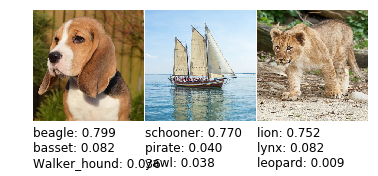

In [36]:
fig = plt.figure()
imgrid = ImageGrid(fig, 111, (1,len(images)))
for i,img in enumerate(images):
    imgrid[i].imshow(img)
    imgrid[i].axis('off')
    descriptions = ['{}: {:.3f}'.format(dd[1], dd[2]) for dd in decoded_preds[i][:3]]
    imgrid[i].text(0, 370, '\n'.join(descriptions), verticalalignment='center', fontsize=12)

In [18]:
fmodel = foolbox.models.KerasModel(model, (-1, 1), channel_axis=3, predicts='probabilities')

In [40]:
attack = foolbox.attacks.LBFGSAttack(fmodel)
images_adv = np.zeros(images.shape)
for i, img in enumerate(images_pre):
    label = np.argmax(fmodel.predictions(img))
    images_adv[i] = attack(img, label)

In [43]:
preds_adv = model.predict(images_adv)
decoded_preds = decode_f(preds_adv)
for dd in decoded_preds:
    dd.sort(key=lambda x: x[2], reverse=True)

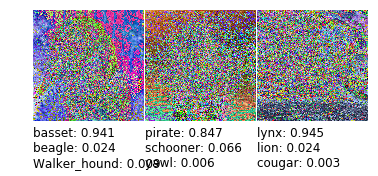

In [47]:
fig = plt.figure()
imgrid = ImageGrid(fig, 111, (1,len(images)))
for i,img in enumerate((images_adv+1)*255):
    imgrid[i].imshow(img)
    imgrid[i].axis('off')
    descriptions = ['{}: {:.3f}'.format(dd[1], dd[2]) for dd in decoded_preds[i][:3]]
    imgrid[i].text(0, 370, '\n'.join(descriptions), verticalalignment='center', fontsize=12)